In [252]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import random

### Load Data

In [310]:
x_128_train = np.load('./mhsma/x_128_train.npy')
x_128_valid = np.load('./mhsma/x_128_valid.npy')
x_128_test = np.load('./mhsma/x_128_test.npy')

print(f'Shape of x_128_train : {x_128_train.shape}')
print(f'Shape of x_128_valid : {x_128_valid.shape}')
print(f'Shape of x_128_test : {x_128_test.shape}')

Shape of x_128_train : (1000, 128, 128)
Shape of x_128_valid : (240, 128, 128)
Shape of x_128_test : (300, 128, 128)


In [311]:
y_acrosome_train = np.load('./mhsma/y_acrosome_train.npy')
y_head_train = np.load('./mhsma/y_head_train.npy')
y_tail_train = np.load('./mhsma/y_tail_train.npy')
y_vacuole_train = np.load('./mhsma/y_vacuole_train.npy')

print(f'Shape of y_acrosome_train : {y_acrosome_train.shape}')
print(f'Shape of y_head_train :     {y_head_train.shape}')
print(f'Shape of y_tail_train :     {y_tail_train.shape}')
print(f'Shape of y_vacuole_train :  {y_vacuole_train.shape}')

Shape of y_acrosome_train : (1000,)
Shape of y_head_train :     (1000,)
Shape of y_tail_train :     (1000,)
Shape of y_vacuole_train :  (1000,)


In [312]:
print(f'Number of abnormal acrosome : {sum(y_acrosome_train)} of 1000 samples')
print(f'Number of abnormal head : {sum(y_head_train)} of 1000 samples')
print(f'Number of abnormal tail : {sum(y_tail_train)} of 1000 samples')
print(f'Number of abnormal vacuole : {sum(y_vacuole_train)} of 1000 samples')

Number of abnormal acrosome : 301 of 1000 samples
Number of abnormal head : 273 of 1000 samples
Number of abnormal tail : 46 of 1000 samples
Number of abnormal vacuole : 170 of 1000 samples


### Visualization

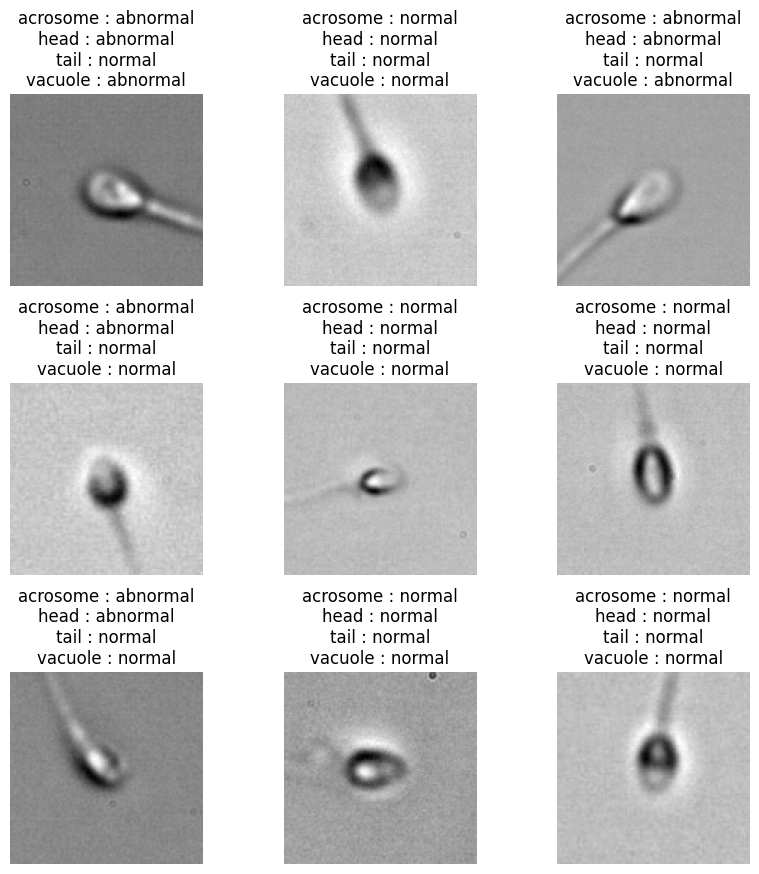

In [48]:
plt.figure(figsize=(10, 10))
state = ['normal', 'abnormal']
for i in range(9):
    img = x_128_train[i]
    acrosome = state[y_acrosome_train[i]]
    head = state[y_head_train[i]]
    tail = state[y_tail_train[i]]
    vacuole = state[y_vacuole_train[i]]
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray', )
    plt.title(f'acrosome : {acrosome}\nhead : {head}\ntail : {tail}\nvacuole : {vacuole}')
    plt.subplots_adjust(hspace=0.5)
    plt.axis('off')
plt.show()

### Imbalance problem solving with over sampling

##### acrosome

In [313]:
#extract normal and abnormal indexes
normal_index = np.where(y_acrosome_train == 0)[0]
abnormal_index = np.where(y_acrosome_train == 1)[0]

In [314]:
#extend the number of abnormal images by oversampling randomlly
abnormal_index = np.append(abnormal_index, random.choices(abnormal_index, k=len(normal_index)-len(abnormal_index)))
#concatenate normal and abnormal indexes
acrosome_index = np.concatenate([normal_index, abnormal_index])

In [321]:
#shuffle the whole indexes several times
for _ in range(10):
    np.random.shuffle(acrosome_index)

In [322]:
#construct the training dataset and labels for acrosome classification
x_acrosome_train = x_128_train[acrosome_index]
y_acrosome_train = y_acrosome_train[acrosome_index]

In [328]:
print(f'Shape of x_acrosome_train : {x_acrosome_train.shape}')
print(f'Shape of y_acrosome_train : {y_acrosome_train.shape}')

Shape of x_acrosome_train : (1398, 128, 128)
Shape of y_acrosome_train : (1398,)


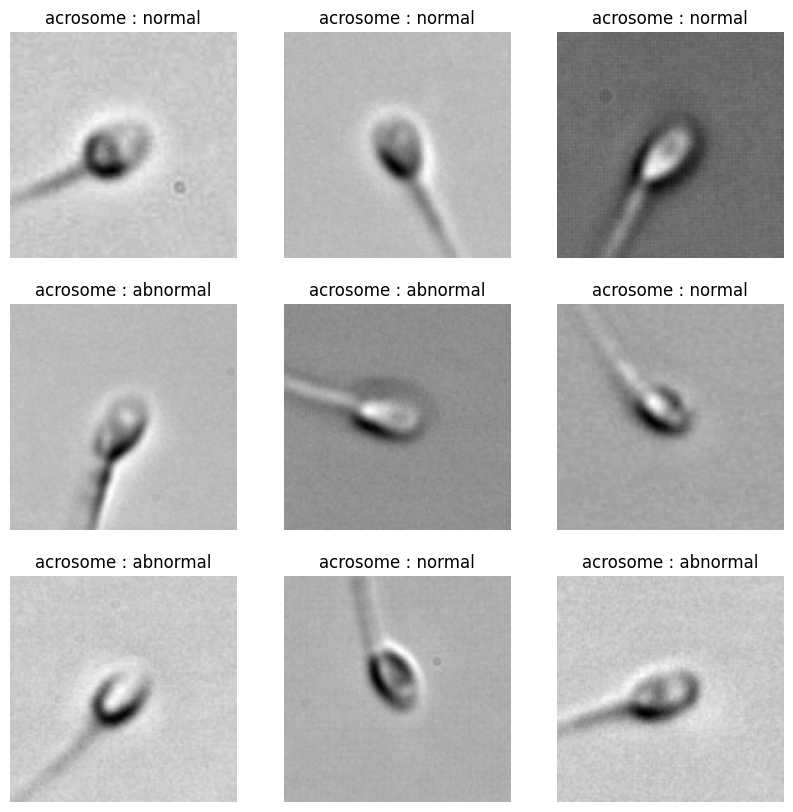

In [326]:
plt.figure(figsize=(10, 10))
state = ['normal', 'abnormal']
for i in range(9):
    img = x_acrosome_train[i]
    acrosome = state[y_acrosome_train[i]]
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray', )
    plt.title(f'acrosome : {acrosome}')
    plt.axis('off')
plt.show()